In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e9b953928c58fce60b6f8dace00361b7


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    #Run an API request for each of the cites 
    try:
    #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
     #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
    #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
    #Append the city information into city_data list
        city_data.append({'City': city.title(),
                        'Lat': city_lat, 
                        'Lng': city_lng, 
                        'Max Temp': city_max_temp, 
                        'Humidity': city_humidity, 
                        'Cloudiness': city_clouds, 
                        'Wind Speed': city_wind, 
                        'Country': city_country, 
                        'Date': city_date})
    
#If an error is experienced, skip the city
    except: 
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | kedrovyy
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | beloha
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | rio grande
Processing Record 8 of Set 1 | arsikere
Processing Record 9 of Set 1 | rawson
Processing Record 10 of Set 1 | alexandria
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | vostok
Processing Record 14 of Set 1 | cap-aux-meules
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | muriwai beach
Processing Record 20 of Set 1 | ostrovnoy
Processing Record 21 of Set 1 | balkhash
Processing Record 22 of Set 1 | muros
Processing Record 23 of Se

Processing Record 42 of Set 4 | samusu
City not found. Skipping...
Processing Record 43 of Set 4 | leningradskiy
Processing Record 44 of Set 4 | blythe
Processing Record 45 of Set 4 | khatanga
Processing Record 46 of Set 4 | nanortalik
Processing Record 47 of Set 4 | saint combs
City not found. Skipping...
Processing Record 48 of Set 4 | concordia
Processing Record 49 of Set 4 | saint-leu
Processing Record 50 of Set 4 | carballo
Processing Record 1 of Set 5 | tual
Processing Record 2 of Set 5 | hambantota
Processing Record 3 of Set 5 | alofi
Processing Record 4 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 5 | kokoda
Processing Record 6 of Set 5 | marzuq
Processing Record 7 of Set 5 | pevek
Processing Record 8 of Set 5 | aflu
City not found. Skipping...
Processing Record 9 of Set 5 | xam nua
Processing Record 10 of Set 5 | puerto carreno
Processing Record 11 of Set 5 | manthani
Processing Record 12 of Set 5 | aurora
Processing Record 13 of Set 5 | wapi pathu

Processing Record 31 of Set 8 | baykit
Processing Record 32 of Set 8 | vestbygda
City not found. Skipping...
Processing Record 33 of Set 8 | haines junction
Processing Record 34 of Set 8 | henties bay
Processing Record 35 of Set 8 | itarema
Processing Record 36 of Set 8 | comodoro rivadavia
Processing Record 37 of Set 8 | novyy urengoy
Processing Record 38 of Set 8 | langsa
Processing Record 39 of Set 8 | ozgon
City not found. Skipping...
Processing Record 40 of Set 8 | yekaterinovka
Processing Record 41 of Set 8 | brokopondo
Processing Record 42 of Set 8 | baturaja
Processing Record 43 of Set 8 | viligili
City not found. Skipping...
Processing Record 44 of Set 8 | xiangdong
City not found. Skipping...
Processing Record 45 of Set 8 | guerrero negro
Processing Record 46 of Set 8 | wasilla
Processing Record 47 of Set 8 | monroe
Processing Record 48 of Set 8 | cabra
Processing Record 49 of Set 8 | grand gaube
Processing Record 50 of Set 8 | aksu
Processing Record 1 of Set 9 | katsina
Proc

Processing Record 14 of Set 12 | tibu
Processing Record 15 of Set 12 | port lincoln
Processing Record 16 of Set 12 | karaul
City not found. Skipping...
Processing Record 17 of Set 12 | vagur
Processing Record 18 of Set 12 | raozan
City not found. Skipping...
Processing Record 19 of Set 12 | sandwick
Processing Record 20 of Set 12 | kamaishi
Processing Record 21 of Set 12 | linxia
Processing Record 22 of Set 12 | kargasok
Processing Record 23 of Set 12 | ambulu
Processing Record 24 of Set 12 | panama city
Processing Record 25 of Set 12 | finschhafen
Processing Record 26 of Set 12 | puri
Processing Record 27 of Set 12 | nuevo progreso
Processing Record 28 of Set 12 | lavrentiya
Processing Record 29 of Set 12 | south lake tahoe
Processing Record 30 of Set 12 | beaverlodge
Processing Record 31 of Set 12 | banapur
Processing Record 32 of Set 12 | ede
Processing Record 33 of Set 12 | stokmarknes
Processing Record 34 of Set 12 | turtas
Processing Record 35 of Set 12 | mazamari
Processing Reco

In [11]:
len(city_data)

565

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,62.89,64,0,1.01,ZA,2021-07-18 21:45:48
1,Kedrovyy,56.1667,91.8167,54.01,84,99,4.36,RU,2021-07-18 21:45:49
2,Carnarvon,-24.8667,113.6333,59.07,60,90,10.36,AU,2021-07-18 21:45:49
3,Beloha,-25.1667,45.0500,67.68,86,53,11.41,MG,2021-07-18 21:45:49
4,Ponta Do Sol,32.6667,-17.1000,73.71,84,1,4.34,PT,2021-07-18 21:45:49
5,Rio Grande,-32.0350,-52.0986,46.94,80,100,36.28,BR,2021-07-18 21:45:50
6,Arsikere,13.3139,76.2561,68.85,90,100,10.02,IN,2021-07-18 21:45:50
7,Rawson,-43.3002,-65.1023,49.55,40,58,16.91,AR,2021-07-18 21:45:50
8,Alexandria,31.2156,29.9553,80.56,74,0,4.61,EG,2021-07-18 21:42:05
9,Ushuaia,-54.8000,-68.3000,40.66,87,40,8.05,AR,2021-07-18 21:45:50


In [13]:
# re-order the dataframe columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-07-18 21:45:48,-33.9258,18.4232,62.89,64,0,1.01
1,Kedrovyy,RU,2021-07-18 21:45:49,56.1667,91.8167,54.01,84,99,4.36
2,Carnarvon,AU,2021-07-18 21:45:49,-24.8667,113.6333,59.07,60,90,10.36
3,Beloha,MG,2021-07-18 21:45:49,-25.1667,45.0500,67.68,86,53,11.41
4,Ponta Do Sol,PT,2021-07-18 21:45:49,32.6667,-17.1000,73.71,84,1,4.34


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

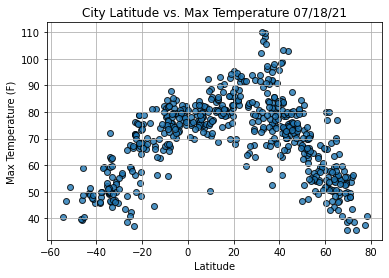

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/city_latitude_vs_max_temperature.png")

# Show plot.
plt.show()

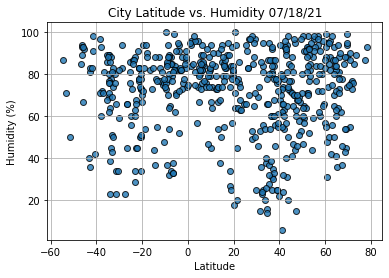

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/city_latitude_vs_humidity.png")
# Show plot.
plt.show()

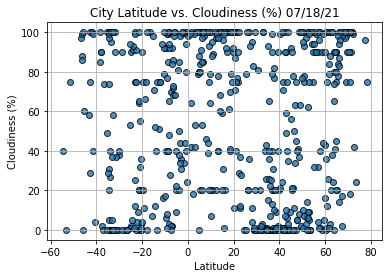

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/city_latitude_vs_cloudiness.png")
# Show plot.
plt.show()

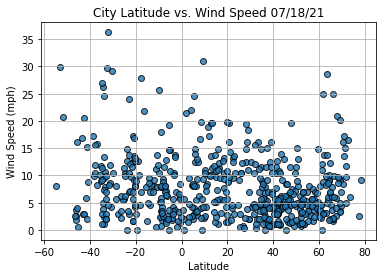

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/city_latitude_vs_wind_speed.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                  Port Alfred
Country                        ZA
Date          2021-07-18 21:41:50
Lat                      -33.5906
Lng                        26.891
Max Temp                     62.2
Humidity                       45
Cloudiness                      0
Wind Speed                  10.56
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >=0

0      False
1       True
2      False
3      False
4       True
       ...  
560     True
561     True
562     True
563     True
564     True
Name: Lat, Length: 565, dtype: bool

In [28]:
# Create a dataframe for the northern hemisphere
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kedrovyy,RU,2021-07-18 21:45:49,56.1667,91.8167,54.01,84,99,4.36
4,Ponta Do Sol,PT,2021-07-18 21:45:49,32.6667,-17.1000,73.71,84,1,4.34
6,Arsikere,IN,2021-07-18 21:45:50,13.3139,76.2561,68.85,90,100,10.02
8,Alexandria,EG,2021-07-18 21:42:05,31.2156,29.9553,80.56,74,0,4.61
10,Bethel,US,2021-07-18 21:45:51,41.3712,-73.4140,83.48,74,75,11.50


In [29]:
# create a dataframe for the southern Hemisphere
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-07-18 21:45:48,-33.9258,18.4232,62.89,64,0,1.01
2,Carnarvon,AU,2021-07-18 21:45:49,-24.8667,113.6333,59.07,60,90,10.36
3,Beloha,MG,2021-07-18 21:45:49,-25.1667,45.0500,67.68,86,53,11.41
5,Rio Grande,BR,2021-07-18 21:45:50,-32.0350,-52.0986,46.94,80,100,36.28
7,Rawson,AR,2021-07-18 21:45:50,-43.3002,-65.1023,49.55,40,58,16.91


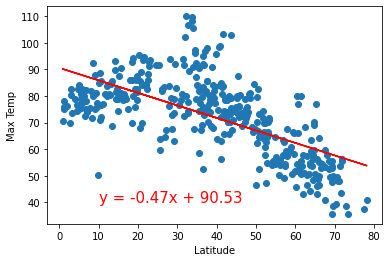

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

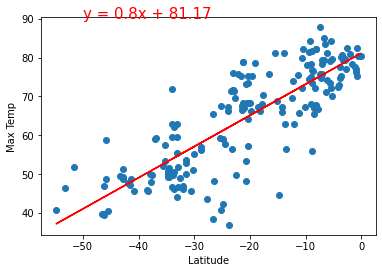

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

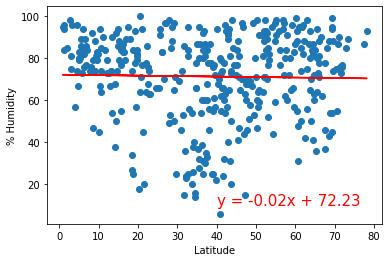

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

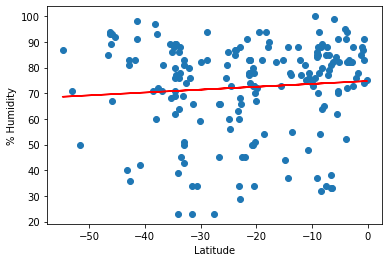

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

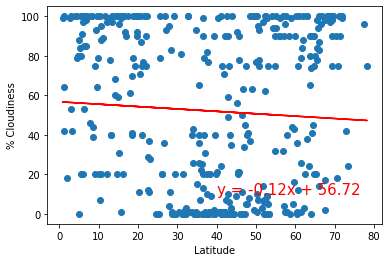

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

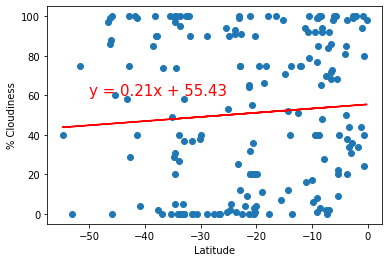

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

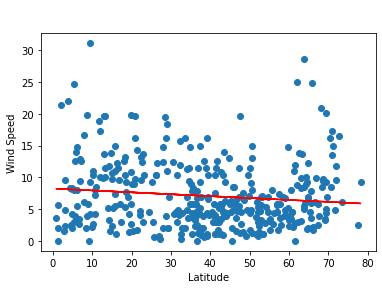

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,35))

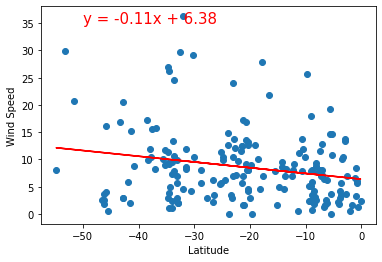

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-50,35))